In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

Use Pandas to import the data from epa-sea-level.csv.

In [2]:
df = pd.read_csv("./epa-sea-level.csv", float_precision="legacy").rename(
        columns={
            "Year": "year",
            "CSIRO Adjusted Sea Level": "sea",
        }
    )
df.head()

,year,sea,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     134 non-null    int64  
 1   sea                      134 non-null    float64
 2   Lower Error Bound        134 non-null    float64
 3   Upper Error Bound        134 non-null    float64
 4   NOAA Adjusted Sea Level  21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis

In [4]:
x = df["year"]
y = df["sea"]

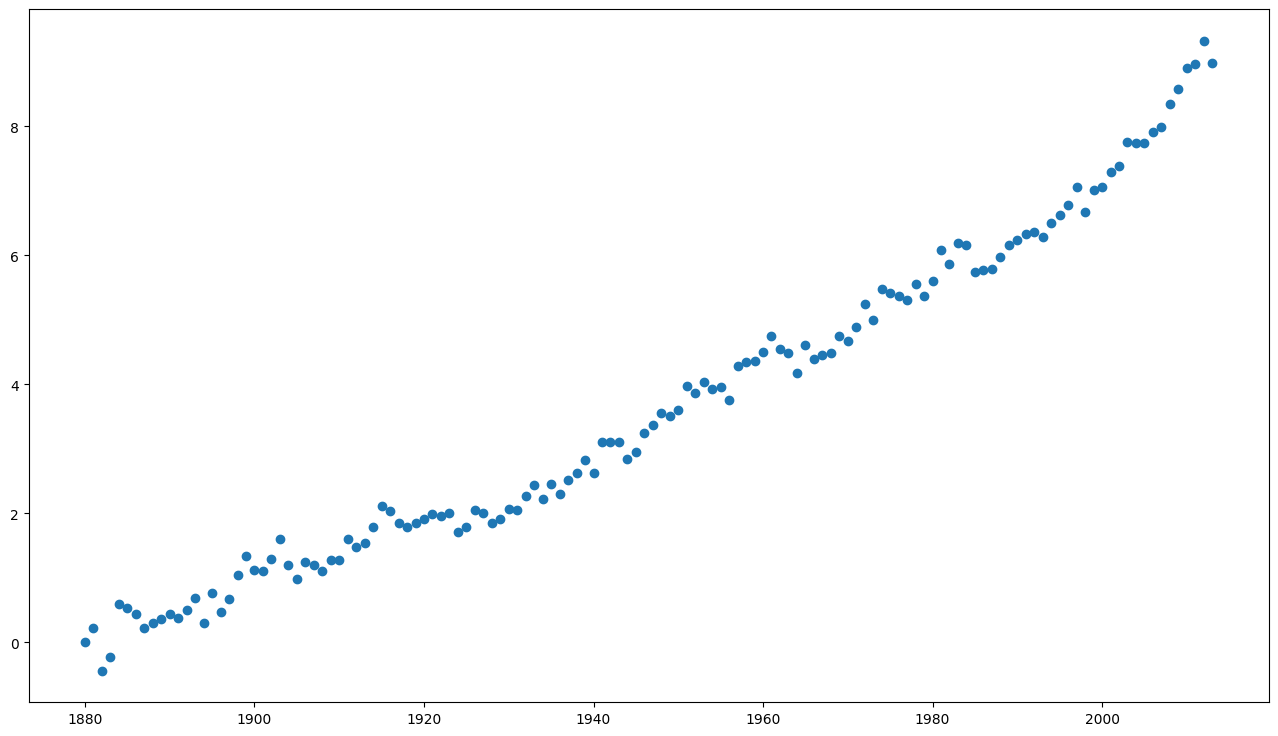

In [5]:
plt.figure(1, figsize=(16, 9))
plt.scatter(x, y)
plt.show()

Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit

In [6]:
regress = stats.linregress(df["year"], df["sea"])
regress

LinregressResult(slope=0.06304458401213482, intercept=-119.06594196773983, rvalue=0.984757131182585, pvalue=3.788696979113155e-102, stderr=0.0009692118713287152, intercept_stderr=1.886943381242523)

In [7]:
# increase data size for future prediction
last_year  = df["year"].max()
df = pd.concat([df, pd.DataFrame([{"year" : y} for y in range (last_year+1, 2050)])], ignore_index=True)

<Figure size 1600x900 with 0 Axes>

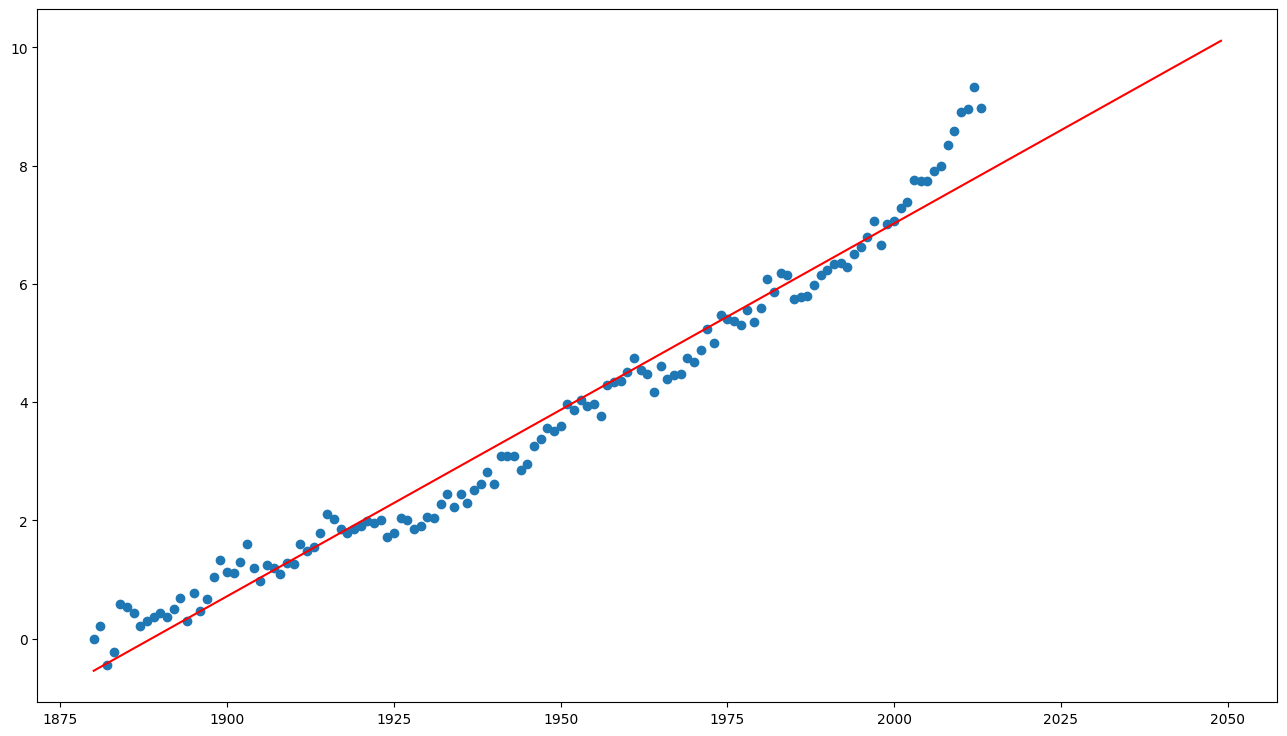

<Figure size 1600x900 with 0 Axes>

In [16]:
plt.figure(figsize=(16, 9))
plt.plot(
        df["year"],
        regress.intercept + regress.slope * df["year"],
        c="r",
        label="fit all",
    )
plt.scatter(df["year"], df["sea"])

In [9]:
# Create second line of best 
df_recent = df.loc[(df["year"]>= 2000) & (df["year"]<= last_year)]
bestfit = stats.linregress(df_recent["year"], df_recent["sea"])
df_recent = pd.concat([df_recent, pd.DataFrame([{"year" : y} for y in range(last_year+1, 2050)])], ignore_index=True)

Text(0.5, 1.0, 'Rise in Sea Level')

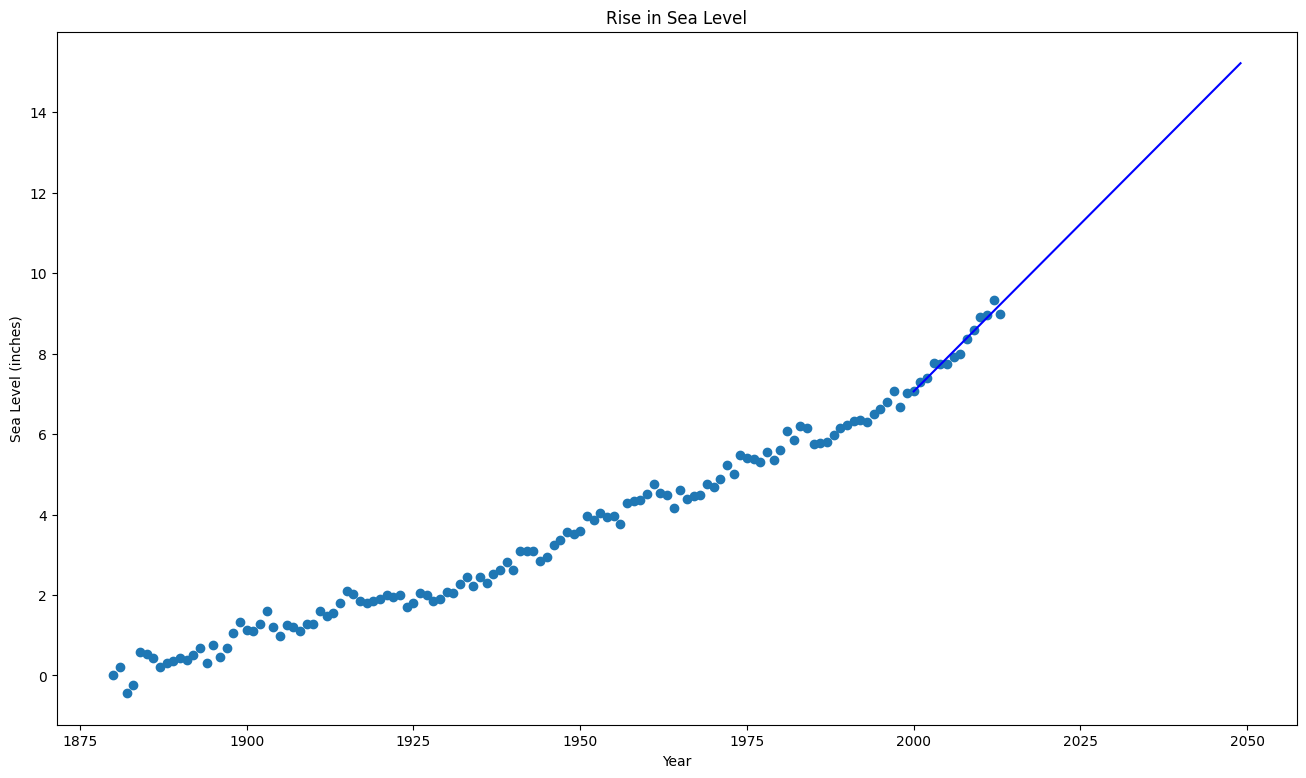

In [20]:
plt.figure(figsize=(16, 9))
plt.scatter(df["year"], df["sea"])
plt.plot( df_recent["year"], bestfit.intercept + bestfit.slope * df_recent["year"],
         c = "b",
         label = "fit recent")
# Add labels and title
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")